# url: https://datawokagaku.com/pca/

次元削減とは？PCA(主成分分析)を理解する【機械学習入門24】

次元削減とは，特徴量の種類が多い場合に必要な処理です．昨今のコンピュータの進化やセンサーなどの多様化により大量の特徴量を取得できるのがあたり前になってきた今，非常に重要な処理です．

次元削減をすることで多次元のデータをわかりやすく可視化したり，学習を高速化することができます．

## 次元削減とは
次元削減はその名の通り．特徴量の数が𝑛，データの数が𝑚とした時の𝑚×𝑛のデータ行列における次元を削減する処理です．

当然，データ数を減らすのは無意味(データは多い方がいいというのが定石)なので，特徴量の数𝑛を減らすことを考えます．

第14回で紹介した正則化項を使ったLassoアルゴリズムも，特徴量を選択するものなので，次元削減の手法の一つと言えますが，今回の記事ではもう一つのPCAという手法を紹介します．

url: https://datawokagaku.com/lasso/

今回の記事で紹介するPCA(主成分分析)は，高次元から低次元へと変換をするアルゴリズムです．

例えば以下な感じ↓(アルゴリズムの詳細については後述します)

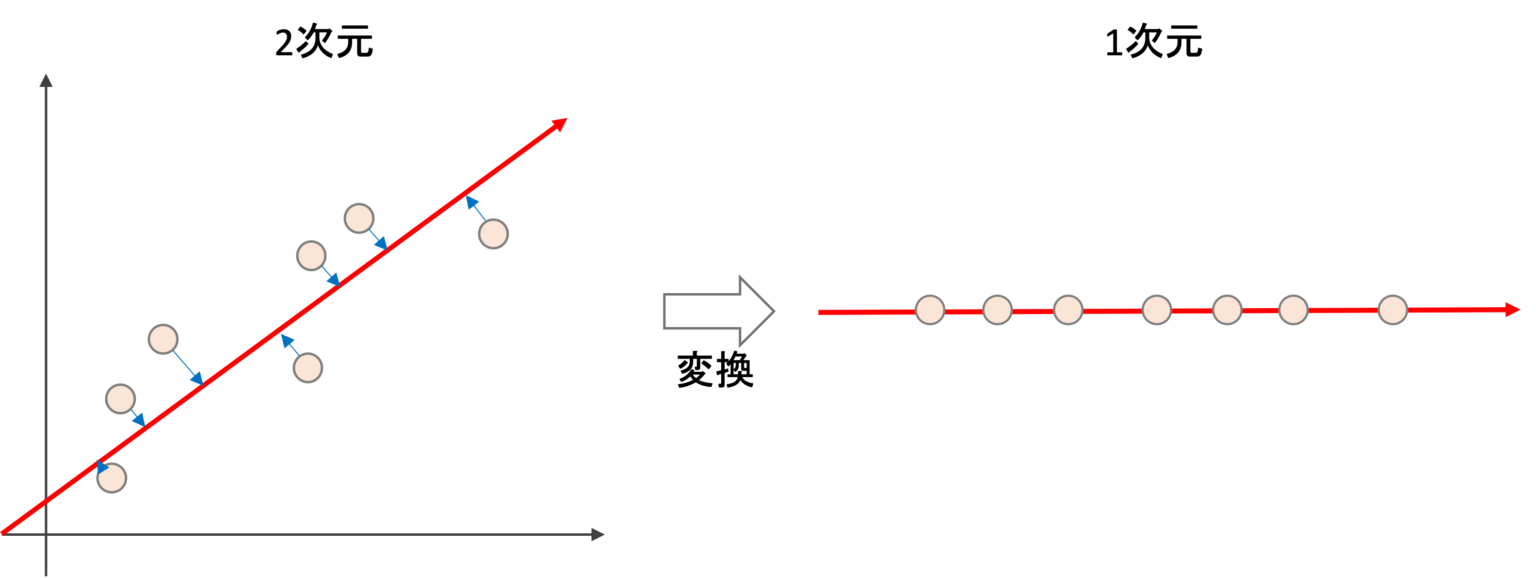

上は2次元のデータを1次元に次元が減っている例です．

Lassoのように特徴量を選択する場合，落とした特徴量の情報は完全に消滅してしまいますが，PCAのように変換をする場合は，全ての特徴量の情報を使うことになるので，あくまでも次元だけを削減する形になります．



## PCAが必要なケース

PCAを使うケースとして主に考えられるのが，

1. 処理の高速化
2. データの可視化
です．

### 1.処理の高速化
PCAをすると，高次元のデータを低次元で扱うことができるようになるのでメモリ節約になり，機械学習モデルの学習コストを大幅に下げることができ，処理の高速化につなげることができます．

2次元から1次元に変換しただけで単純計算で半分になっていますが，実際には1000次元を10次元にするなど，PCAを使うことでかなりの次元を圧縮することができ，計算資源の節約につながります．

### 2.データの可視化
多次元のデータを可視化するのは難しいですよね？平面で可視化できるのはせいぜい3次元のデータまで．

例えば第18回のirisデータセットの可視化のように，特徴量が4つ以上になるとデータの可視化をするのにいろんな軸の組み合わせを見る必要がありますが，もしこの次元を2次元で表せたら便利です．

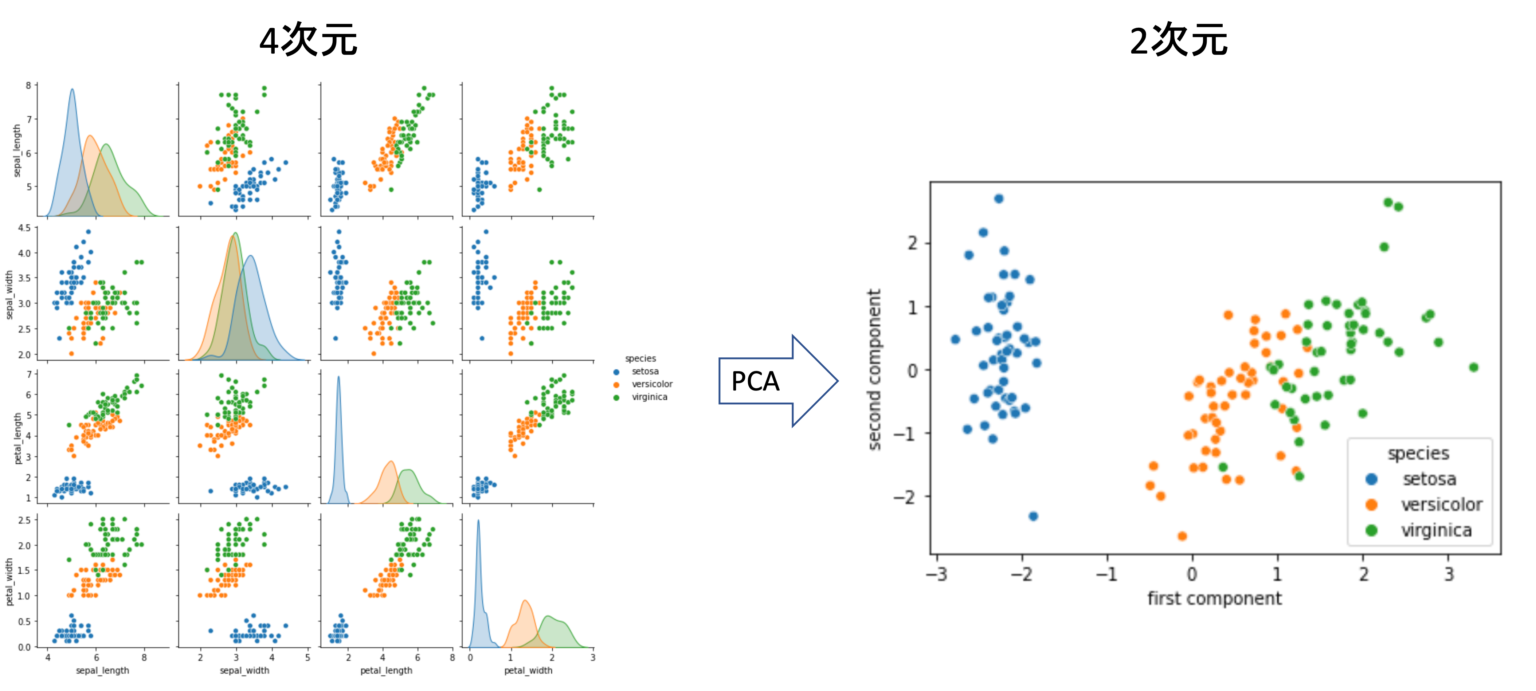

上の例は実際にirisデータセットに対してPCAをして２次元に次元削減をした例です．２次元にしても，3つの種のクラスを区別するには十分そうですね！(このやり方については後ほど解説します．)

このようにPCAをすることで，多次元のデータも2次元や3次元にして，簡単にデータを可視化することができます．実際のデータサイエンスの業務でも，データの分布を確認する際にまずはPCAをして2次元や3次元でデータの可視化をすることが多いです．

## PCAとは？
PCA(Principal Component Analysis)は，次元削減の一つの手法で，日本語では主成分分析と言います．

PCAはその名の通り，データの主成分(principal component)となる軸を探し，その軸にデータを写像する形で次元を圧縮します．

まず，「データの主成分となる軸」とはなんでしょうか？これは，「データを最もよく表している軸」ということです．

では，それはどんな軸でしょうか？これは，データが最も分散している軸になります．以下の例を見てみましょう

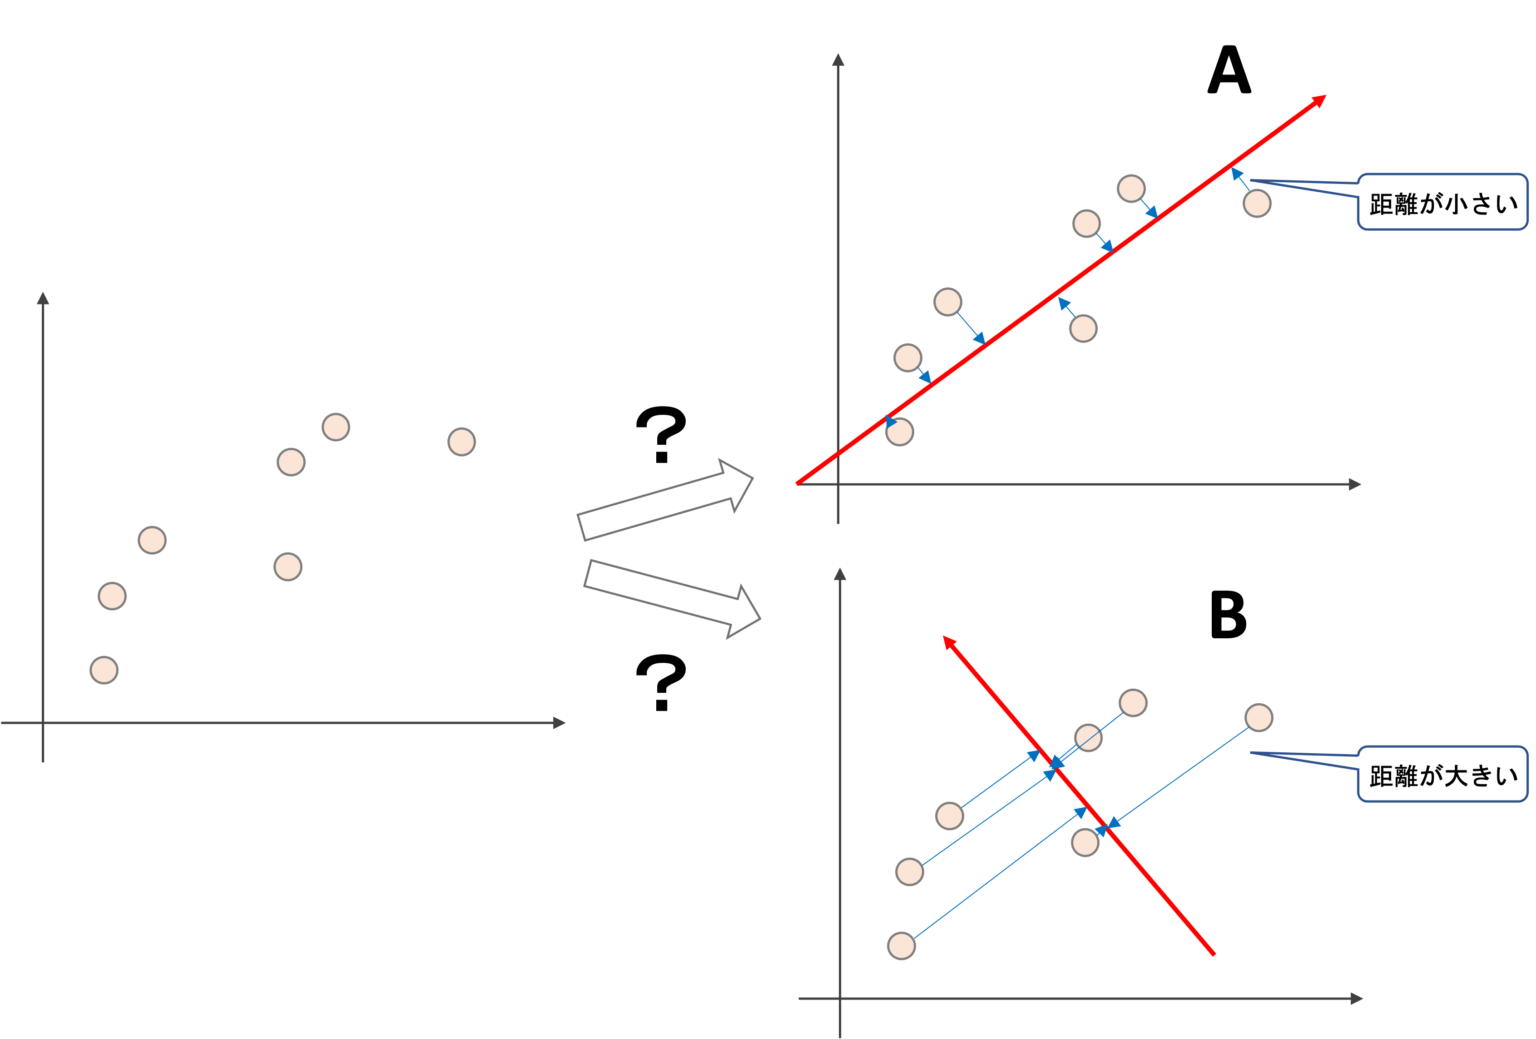

上図左のような2次元のデータがあったとして，このデータをある1次元の軸に写像(軸に垂直に射影)をすることを考えます．この時，どのような軸に写像させるのが一番情報を落とさずに済むでしょうか？

Aの例では，そこまでそれぞれのデータの関係性が変わらないのに対し，Bの例では写像後のデータはだいぶ元のものと異なるものになってしまうのがイメージできると思います．

これは言い換えると，「写像の際に元のデータから移動する距離を最小にする軸」が，最適な軸であると言えます．(つまり上図の青の矢印の長さの合計が最小になるような軸)

これは実は，「データが最も広がっている軸」なんですね．上図のAとBを見比べてもなんとなくイメージつくと思います．これがそのデータの主成分です．

### 注意
PCAを実施する前に，特徴量間のスケールを合わせるために標準化をする必要があります．これは，PCAがデータの分散を見ることからも明らかですね．スケールがあっていないと，正しくデータの分散が大きい軸を見つけることができません．
主成分には第1主成分，第2主成分，，，と複数の主成分を作ることができ，最終的に圧縮したい次元の数だけ主成分があります．

たとえば3次元を2次元に次元を圧縮する場合，第1主成分(first principal component: PC1)と第2主成分(second principal component: PC2)を考えます．第2主成分は，第1主成分に“直交する軸の中で”最もデータが分散する軸になります．(下図は例です．plotの丸の大小は奥行きを表してます，大きいものは近くにあって，小さいものは遠くにあると思ってください．・・・わらりにくくてすみません苦笑)



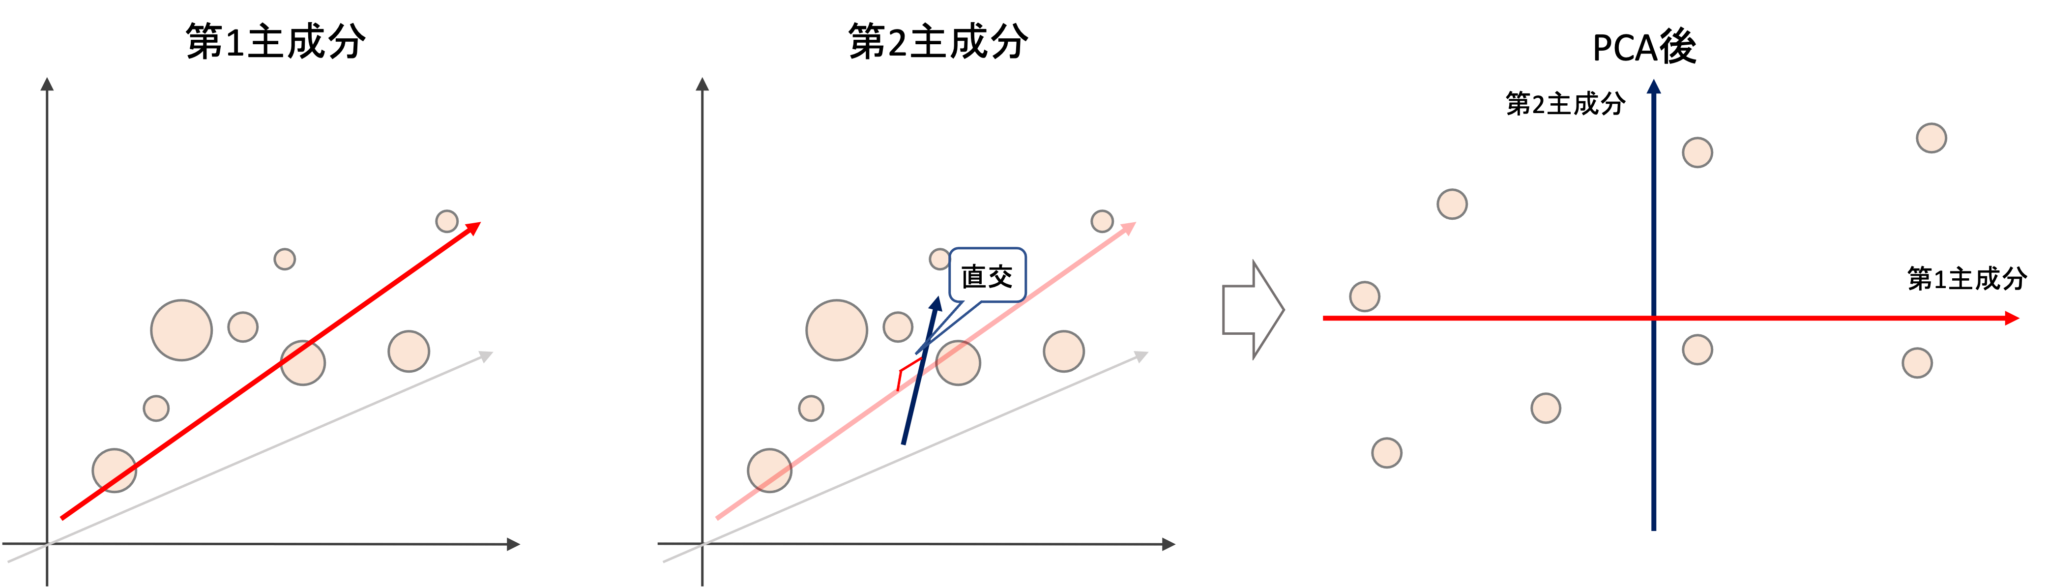

つまりこのケースでは，最もデータの分布を表している平面上にデータを写像していることになります．

４次元以上の次元でも同じです．最もデータが分散している軸を第1主成分として，それに直交するという制限の下で最もデータが分散している軸を第2主成分とし，それに直交する制限の下で最もデータが分散している軸を第3主成分とし，，，，etc．これを繰り返していきます．

2次元に圧縮したければ第1主成分と第2主成分を使います．3次元であれば第1~第3主成分を使います．それぞれの主成分が軸になり，あらたな次元空間が出来上がるわけです．

### 補足
本講座では数学的な話はせず，以上の説明に留めておきます．数学的な理論の説明は他の専門書に譲るとして，本講座ではPCAをどう使うのか?にフォーカスしたいと思います

## PythonでPCAをする
それでは，実際にPythonでPCAを実行して次元を圧縮してみましょう！

scikit-learnにはPCAを簡単に実行してくれるクラス sklearn.decomposition.PCA が用意されています．(もうね，なんでもありますよscikit-learnにはっ・・・！！)

PCAの理論背景を理解した上で，ありがたく使いましょう！

今回はirisデータセットに対してPCAを実施してみます．

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


何度か過去にやった通り，irisデータには4つの特徴量とspeciesが記載されています．

それではまずは標準化を行います．標準化を行うには sklearn.preprocessing.StandardScaler を使えばいいんでしたね！

In [2]:
from sklearn.preprocessing import StandardScaler

# 特徴量と目的変数を分離
X = df.loc[:, df.columns!='species']
y = df['species'].values

# 標準化
X = StandardScaler().fit_transform(X)

標準化ができたら今度はPCAを実施します．

sklearn.decomposition.PCA クラスのインスタンス生成時に， n_components 引数に使用する主成分の数(圧縮先の次元数)を指定します．今回は2次元平面上に可視化したいので 2 を指定します．使い方は上の StandardScalerクラスと同じ感じで .fit() して .transform() すればOKです．(後述しますが， n_components 引数に0~1の値を入れると，その値に応じた累積寄与率に達するまでに必要な主成分の数を設定してくれます．)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pc = pca.transform(X)

これをDataFrameにして sns.scatterplot() でplotすればOKです．

In [4]:
import numpy as np
import pandas as pd

y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=['first component', 'second component', 'species']).astype({'first component':float, 'second component':float})

それではplotしてみます．

<Axes: xlabel='first component', ylabel='second component'>

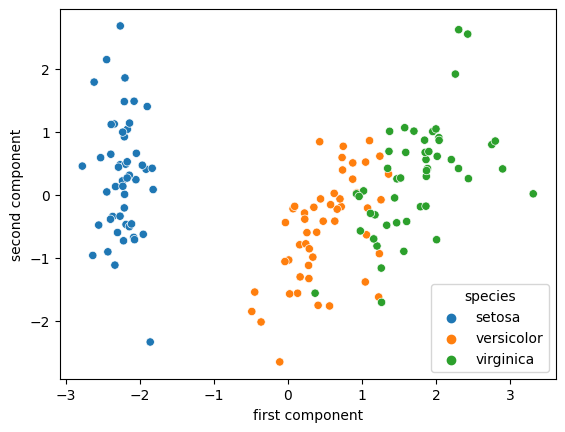

In [5]:
sns.scatterplot(x='first component', y='second component', hue='species', data=df_pc)

こんな感じで，PCAをすることでデータの分布を2次元で表すことができました．次元を削減しても，それぞれのクラスを分類するのは簡単そうですね！

興味がある人は， n_components=3 で3次元で可視化してみてください！

このように，特徴量が多い場合の可視化にはPCAが便利です



## 主成分の解釈
PCAを行った後の主成分(Principal Components)をどのように解釈したらいいのでしょうか？ただ単に「PCAで次元削減できてうれしー！」でもいいんですが，この結果にもう少し踏み込んでみます．

### 寄与率 (explained variance ratio)
各主成分がどれくらいデータを説明できているのかを表す指標として使われるのが寄与率(explained variance)です．

PCAクラスのインスタンスの， .explained_variance_ratio_ 属性でアクセスすることができます．試しにさきのコードの n_components=4 でそれぞれの主成分の寄与率を確認してみます．

In [6]:
pca = PCA(n_components=4)
pca.fit(X)

# 寄与率
pca.explained_variance_ratio_

# 例でのデータ: array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

これはつまり，第1主成分でデータ全体の約92%を説明できており，第2主成分では約5%ほどしかデータを説明できていないということになります．

これを見れば，大体いくつくらいの次元まで圧縮させるべきかがわかります．

## 累積寄与率
この寄与率を累積して,ある寄与率に達するまでには第何主成分までが必要かを見ることが多いです．

これは単純に np.cumsum() すればOKです．

In [7]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

# こんな風にplotしてあげるとわかりやすいかもしれません

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

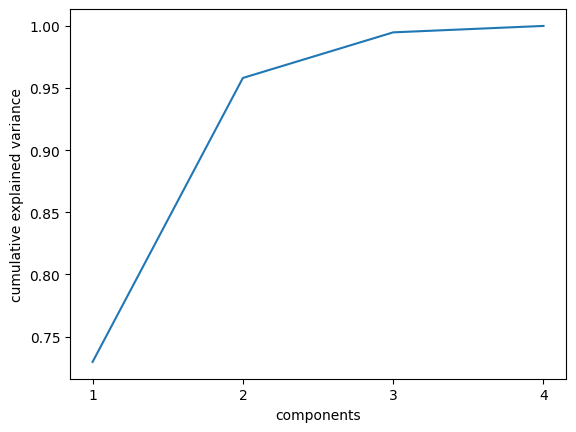

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
n_components = 4
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.xlabel('components')
plt.ylabel('cumulative explained variance')

PCA クラスのインスタンス生成時に n_components 引数に0~1の値を入れることで，指定した累積寄与率になるように主成分の数を自動で設定してくれます．

次回も引き続きPCAを扱っていくので，こういった解釈が実際にどう活きるのかを解説していきます．

ひとまず今は，こういう情報にもアクセスできるんだと思っていただければOKです．



## まとめ
今回の記事では次元削減の手法であるPCA(Principal Component Analysis: 主成分分析)について解説をしました．

    PCAは高次元から低次元へ変換を行うアルゴリズム
    PCAによって次元を削減することにより学習の高速化やデータの可視化をすることができる
    PCAはデータが最も分散している軸に対してデータを射影することで次元を圧縮していく．これらの軸を主成分(Principal Components)という
    それぞれの主成分には，データをどれだけ説明しているかを表す寄与率という指標があり，これによりどれだけの情報が失われたかがわかる
次回の記事ではPCAを使って実際にモデルを学習していきます．高次元を低次元にすることによって，どれだけ学習コストが減り精度がどう変わるのかをみてみましょう！